# Upload to AWS S3

https://realpython.com/python-boto3-aws-s3/

In [1]:
!pip install boto3

  Using cached https://files.pythonhosted.org/packages/ea/43/4b4a1b26eb03a429a4c37ca7fdf369d938bd60018fc194e94b8379b0c77c/s3transfer-0.3.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/07/cb/5f001272b6faeb23c1c9e0acc04d48eaaf5c862c17709d20e3469c6e0139/jmespath-0.10.0-py2.py3-none-any.whl
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import boto3

# Let's use Amazon S3
s3 = boto3.resource('s3')

In [3]:
# Print out bucket names
for bucket in s3.buckets.all():
    print(bucket.name)

aiworkflow
diigo-knowledge-graph
matlab2020b
self-driving-dataset
zappa-3czvv42gy
zappa-54ckqvw8t
zappa-d5a55jhy6
zappa-pn076q184
zappa-ri494sdm2
zappa-w6lpl9cl0


In [5]:
aibucket = s3.Bucket('aiworkflow')

for file in aibucket.objects.all():
    print(file.key)

## Upload a file to an S3 bucket

    :param file_name: File to upload
    :param bucket: Bucket to upload to
    :param object_name: S3 object name. If not specified then file_name is used
    
https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-uploading-files.html

In [9]:
training_dataset = "2021-03-06-1"
img = "img_0.png"
training_data_0 = "../samples/"+training_dataset+"/"+img
training_data_0

'../samples/2021-03-06-1/img_0.png'

In [17]:
import os
training_files = os.listdir("../samples/"+training_dataset)
training_files[0:5]

['data.csv', 'img_0.png', 'img_1.png', 'img_10.png', 'img_100.png']

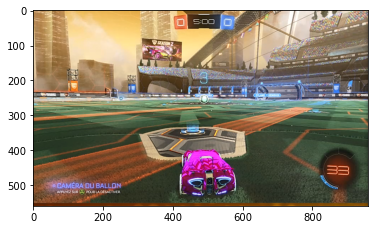

In [10]:
import cv2
import matplotlib.pyplot as plt
img2 = cv2.imread(training_data_0)
# img2
plt.imshow(img2)

In [11]:
s3_client = boto3.client('s3')
file_name = training_dataset+"_"+img
s3_bucket = "aiworkflow"
# s3_client.upload_file(file_name, bucket, object_name)

In [13]:
s3_client.upload_file(training_data_0, s3_bucket, file_name)

In [14]:
aibucket = s3.Bucket('aiworkflow')

for file in aibucket.objects.all():
    print(file.key)

2021-03-06-1_img_0.png


## Download File

https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-example-download-file.html

In [15]:
import boto3
# https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-example-download-file.html
s3_client = boto3.client('s3')

file_name = training_dataset+"_"+img
s3_bucket = "aiworkflow"
# s3.download_file('BUCKET_NAME', 'OBJECT_NAME', 'FILE_NAME')
s3_client.download_file(s3_bucket, file_name,file_name)

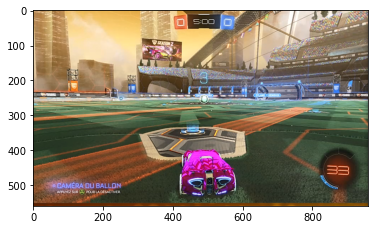

In [16]:
import cv2
import matplotlib.pyplot as plt
img3 = cv2.imread(file_name)
plt.imshow(img3)

## Access public S3 bucket

Grant public access the S3 bucket

https://aws.amazon.com/fr/premiumsupport/knowledge-center/read-access-objects-s3-bucket/
```
{
    "Version": "2008-10-17",
    "Statement": [
        {
            "Sid": "AllowPublicRead",
            "Effect": "Allow",
            "Principal": {
                "AWS": "*"
            },
            "Action": "s3:GetObject",
            "Resource": "arn:aws:s3:::self-driving-dataset/*"
        }
    ]
}
```

In [18]:
DATA_URL_ROOT = "https://aiworkflow.s3.eu-west-3.amazonaws.com/"
training_dataset = "2021-03-06-1"
selected_frame = "img_0.png"

In [19]:
import urllib
import numpy as np
import cv2
def load_image(url):
    with urllib.request.urlopen(url) as response:
        image = np.asarray(bytearray(response.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = image[:, :, [2, 1, 0]] # BGR -> RGB
    return image

Source : https://github.com/streamlit/demo-self-driving/blob/230245391f2dda0cb464008195a470751c01770b/streamlit_app.py#L208

In [23]:
import os
image_url = os.path.join(DATA_URL_ROOT,training_dataset+"_"+selected_frame)
# image_url
image = load_image(image_url)

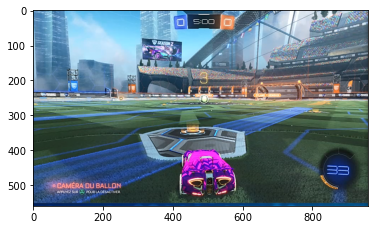

In [24]:
import matplotlib.pyplot as plt
plt.imshow(image)